In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# path to processed data
P = "../data/processed/"

# load master state-wise dataset
clean_master = pd.read_csv(P + "MASTER_statewise_core_crime_dataset.csv")

clean_master.head()


,state_ut,2020,2021,2022,Mid-Year Projected Population (in Lakhs) (2022),Rate of Cognizable Crimes (IPC) (2022),Chargesheeting Rate (2022),population_2011,literacy_rate_2011,urbanization_rate_2011,...,Adult Victims - 62 Years and above - Tr - Col.(33),Adult Victims - 63 Years and above - T - Col.(34),Adult Victims - Total Adult Victims - M - Col.(35),Adult Victims - Total Adult Victims - F - Col.(36),Adult Victims - Total Adult Victims - Tr - Col.(37),Adult Victims - Total Adult Victims - T - Col.(38),Total Victims (Child + Adult) - M - Col.(39),Total Victims (Child + Adult) - F - Col.(40),Total Victims (Child + Adult) - Tr - Col.(41),Total Victims (Child + Adult) - T - Col.(42)
0,Andhra Pradesh,188997,179611,158547,530.3,299.0,86.5,49577103.0,67.02,29.47,...,0.0,2.0,142.0,231.0,0.0,373.0,171.0,756.0,0.0,927.0
1,Arunachal Pradesh,2244,2626,2308,15.5,148.8,47.2,1383727.0,65.38,22.94,...,0.0,0.0,18.0,19.0,0.0,37.0,26.0,55.0,0.0,81.0
2,Assam,111558,119883,59315,354.9,167.1,32.6,31205576.0,72.19,14.08,...,0.0,63.0,342.0,2807.0,0.0,3149.0,645.0,4601.0,0.0,5246.0
3,Bihar,194698,186006,211079,1255.3,168.1,75.4,104099452.0,61.80,11.30,...,0.0,26.0,1104.0,5691.0,0.0,6795.0,1632.0,10190.0,0.0,11822.0
4,Chhattisgarh,65216,70519,73822,299.5,246.5,80.4,25545198.0,70.28,23.24,...,0.0,0.0,29.0,12.0,0.0,41.0,559.0,2218.0,0.0,2777.0


In [3]:
#remove aggregate rows
clean_master = clean_master[
    ~clean_master["state_ut"].isin([
        "total all india",
        "total state (s)",
        "total ut(s)"
    ])
]


In [4]:
#load shapefile for india
india_map = gpd.read_file(
    "../data/India State files/India State files/India_State_Boundary.shp"
)

india_map.head()


,Name,Type,geometry
0,West Bengal,State,"MULTIPOLYGON (((88.01861 21.57278, 88.01889 21..."
1,Andaman & Nicobar,Union Territory,"MULTIPOLYGON (((92.90124 12.91071, 92.90157 12..."
2,Chandigarh,Union Territory,"POLYGON ((76.77232 30.7942, 76.77286 30.79343,..."
3,Daman and Diu and Dadra and Nagar Haveli,Union Territory,"MULTIPOLYGON (((72.96339 20.33227, 72.9639 20...."
4,Delhi,Union Territory,"POLYGON ((77.10591 28.87005, 77.10668 28.86989..."


In [5]:
#standardize state name column
india_map = india_map.rename(columns={"Name": "state_ut"})

india_map["state_ut"] = india_map["state_ut"].str.strip().str.lower()
clean_master["state_ut"] = clean_master["state_ut"].str.strip().str.lower()


In [6]:
#fix state name mismatch
state_fix = {
    "tamilnadu": "tamil nadu",
    "telengana": "telangana",
    "chhattishgarh": "chhattisgarh",
    "andaman & nicobar": "andaman and nicobar islands",
    "daman and diu and dadra and nagar haveli": "dadra and nagar haveli and daman and diu"
}

india_map["state_ut"] = india_map["state_ut"].replace(state_fix)
clean_master["state_ut"] = clean_master["state_ut"].replace(state_fix)


In [7]:
map_df = india_map.merge(clean_master, on="state_ut", how="left")

map_df.head()
set(india_map["state_ut"]) - set(map_df["state_ut"].dropna())



set()

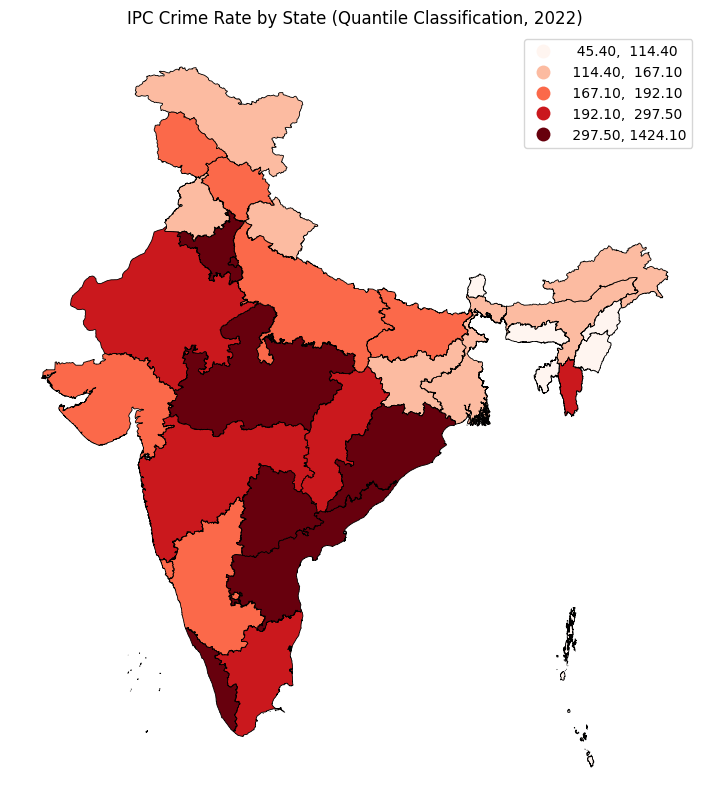

In [9]:
#choropleth map of IPC crime rate by state using quantile classification
fig, ax = plt.subplots(1, 1, figsize=(10,10))

map_df.plot(
    column="Rate of Cognizable Crimes (IPC) (2022)",
    scheme="Quantiles",
    k=5,
    cmap="Reds",
    linewidth=0.6,
    edgecolor="black",
    legend=True,
    ax=ax
)

ax.set_title("IPC Crime Rate by State (Quantile Classification, 2022)")
ax.axis("off")
plt.show()


Quantile classification highlights relative crime intensity across states, making spatial differences clearly visible.

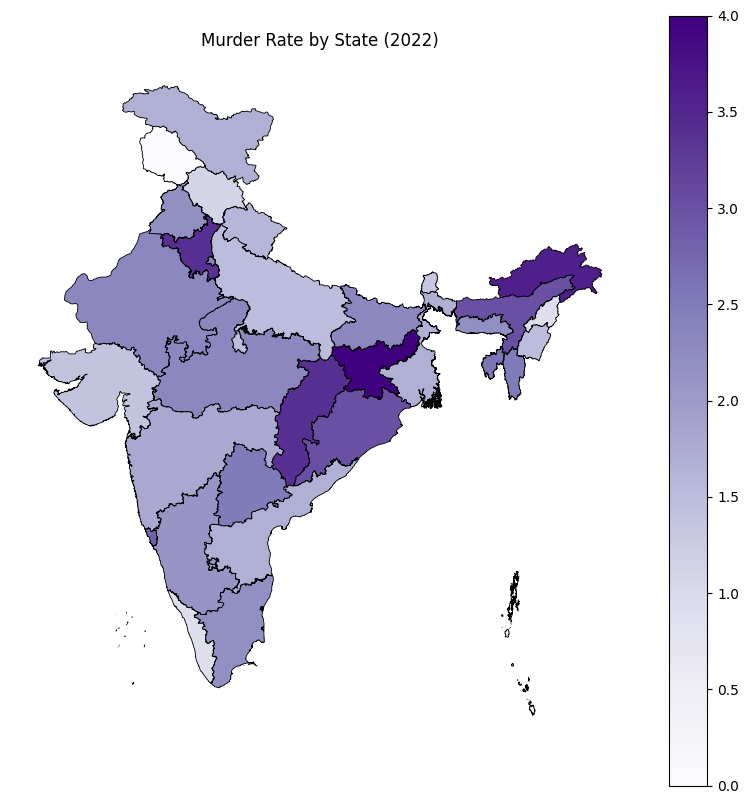

In [10]:
#Choropleth – Murder Rate by State (2022)
fig, ax = plt.subplots(1, 1, figsize=(10,10))

map_df.plot(
    column="murder_rate_2022",
    cmap="Purples",
    linewidth=0.6,
    edgecolor="black",
    legend=True,
    ax=ax
)

ax.set_title("Murder Rate by State (2022)")
ax.axis("off")
plt.show()

The spatial distribution of murder rates differs from overall IPC crime rates, indicating regional variation in crime severity.

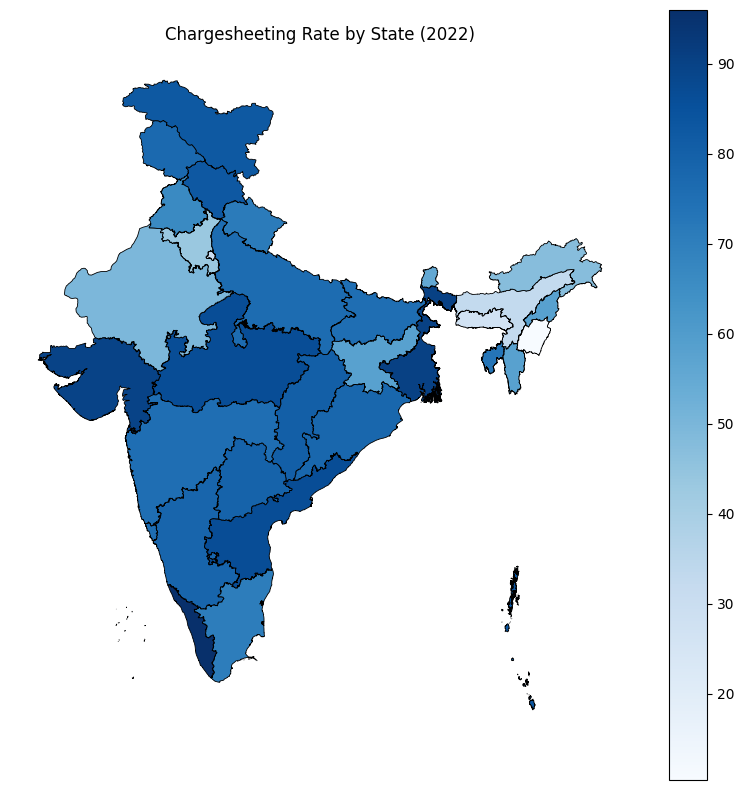

In [11]:
#Choropleth – Chargesheeting Rate by State (2022)
fig, ax = plt.subplots(1, 1, figsize=(10,10))

map_df.plot(
    column="Chargesheeting Rate (2022)",
    cmap="Blues",
    linewidth=0.6,
    edgecolor="black",
    legend=True,
    ax=ax
)

ax.set_title("Chargesheeting Rate by State (2022)")
ax.axis("off")
plt.show()

Chargesheeting efficiency shows notable inter-state variation, reflecting differences in investigation and judicial processes rather than crime volume.

c:\Users\Gayatri\OneDrive\Desktop\crime_analysis_india\venv\Lib\site-packages\geopandas\geodataframe.py:1969: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)


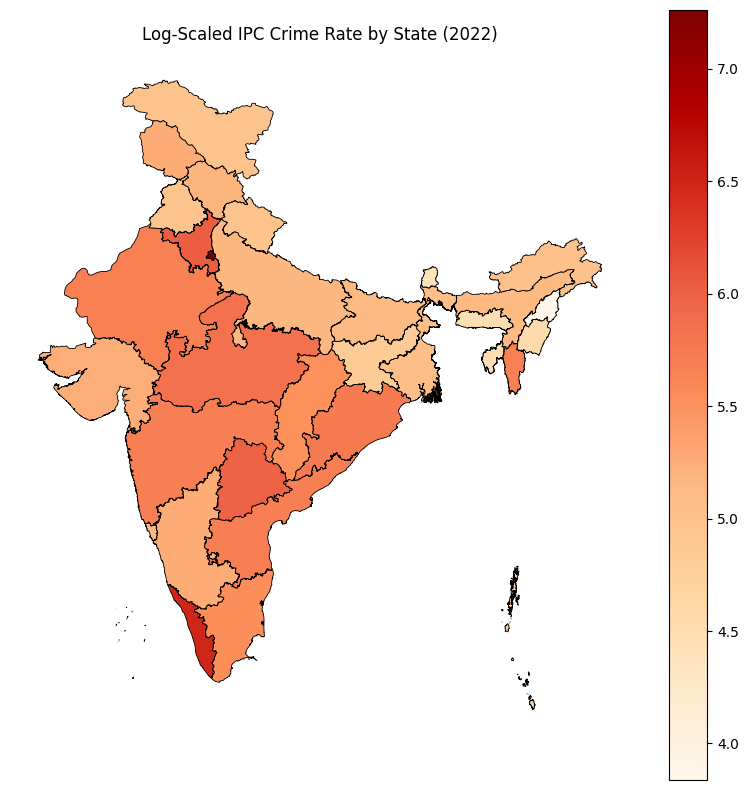

In [12]:
#log scaled choropleth -IPC Crime Rate
# create log-scaled variable
map_df["ipc_crime_log"] = np.log1p(
    map_df["Rate of Cognizable Crimes (IPC) (2022)"]
)

fig, ax = plt.subplots(1, 1, figsize=(10,10))

map_df.plot(
    column="ipc_crime_log",
    cmap="OrRd",
    linewidth=0.6,
    edgecolor="black",
    legend=True,
    ax=ax
)

ax.set_title("Log-Scaled IPC Crime Rate by State (2022)")
ax.axis("off")
plt.show()


Log scaling reduces the dominance of extreme values and reveals meaningful spatial variation among mid-range crime states.

c:\Users\Gayatri\OneDrive\Desktop\crime_analysis_india\venv\Lib\site-packages\geopandas\geodataframe.py:1969: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)


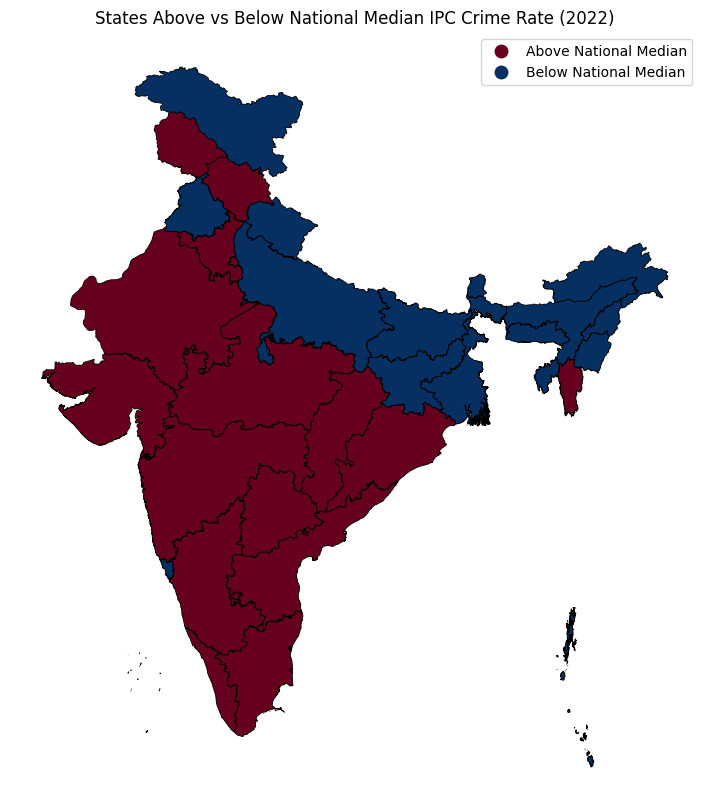

In [13]:
#Diverging Choropleth – Above vs Below National Median IPC Crime Rate
median_ipc = map_df["Rate of Cognizable Crimes (IPC) (2022)"].median()

map_df["ipc_median_class"] = np.where(
    map_df["Rate of Cognizable Crimes (IPC) (2022)"] >= median_ipc,
    "Above National Median",
    "Below National Median"
)

fig, ax = plt.subplots(1, 1, figsize=(10,10))

map_df.plot(
    column="ipc_median_class",
    cmap="RdBu",
    linewidth=0.6,
    edgecolor="black",
    legend=True,
    ax=ax
)

ax.set_title("States Above vs Below National Median IPC Crime Rate (2022)")
ax.axis("off")
plt.show()


the diverging map clearly separates states with relatively higher crime burden from those below the national benchmark, aiding prioritization for policy intervention.

C:\Users\Gayatri\AppData\Local\Temp\ipykernel_21420\622797626.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  map_df["centroid"] = map_df.geometry.centroid
C:\Users\Gayatri\AppData\Local\Temp\ipykernel_21420\622797626.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  map_df.centroid.x,
C:\Users\Gayatri\AppData\Local\Temp\ipykernel_21420\622797626.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  map_df.centroid.y,


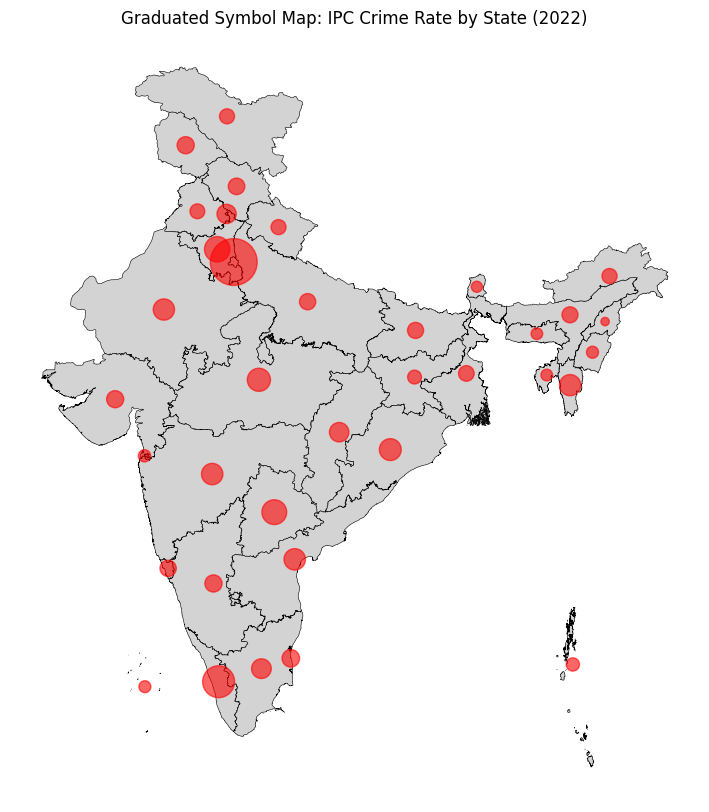

In [15]:
#Graduated Symbol (Bubble) Map – IPC Crime Rate (2022)
fig, ax = plt.subplots(1, 1, figsize=(10,10))

# plot base map
map_df.plot(
    ax=ax,
    color="lightgrey",
    edgecolor="black",
    linewidth=0.4
)

# plot bubbles at centroids
map_df["centroid"] = map_df.geometry.centroid

ax.scatter(
    map_df.centroid.x,
    map_df.centroid.y,
    s=map_df["Rate of Cognizable Crimes (IPC) (2022)"] * 0.8,
    color="red",
    alpha=0.6
)

ax.set_title("Graduated Symbol Map: IPC Crime Rate by State (2022)")
ax.axis("off")
plt.show()


Larger symbols immediately identify states with higher IPC crime burden, making magnitude-based comparison intuitive without relying on color gradients.

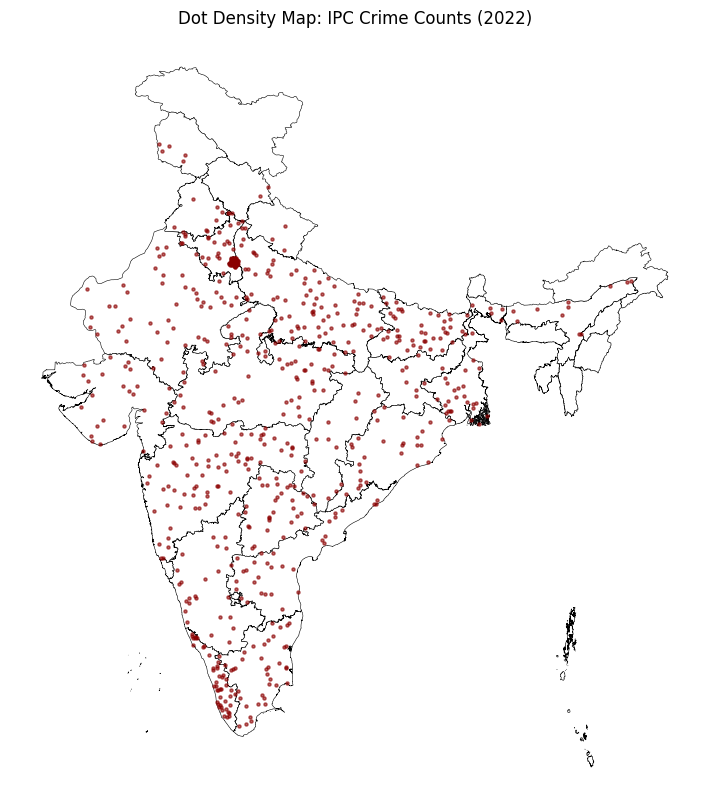

In [18]:
#Dot Density Map – IPC Crime Intensity (2022)
from shapely.geometry import Point

def random_points_within(poly, num_points):
    points = []
    minx, miny, maxx, maxy = poly.bounds

    while len(points) < num_points:
        random_point = Point(
            np.random.uniform(minx, maxx),
            np.random.uniform(miny, maxy)
        )
        if poly.contains(random_point):
            points.append(random_point)

    return points
np.random.seed(42)

fig, ax = plt.subplots(1, 1, figsize=(10,10))

# base map
map_df.plot(
    ax=ax,
    color="white",
    edgecolor="black",
    linewidth=0.4
)

dots_per_unit = 5000  # 1 dot = 5000 crimes

for _, row in map_df.iterrows():
    if not np.isnan(row["2022"]):
        num_dots = int(row["2022"] / dots_per_unit)

        if num_dots > 0:
            points = random_points_within(row.geometry, num_dots)
            xs = [p.x for p in points]
            ys = [p.y for p in points]

            ax.scatter(xs, ys, s=5, color="darkred", alpha=0.6)

ax.set_title("Dot Density Map: IPC Crime Counts (2022)")
ax.axis("off")
plt.show()



Random point generation for dot density mapping was constrained within state polygon geometries to ensure cartographic accuracy

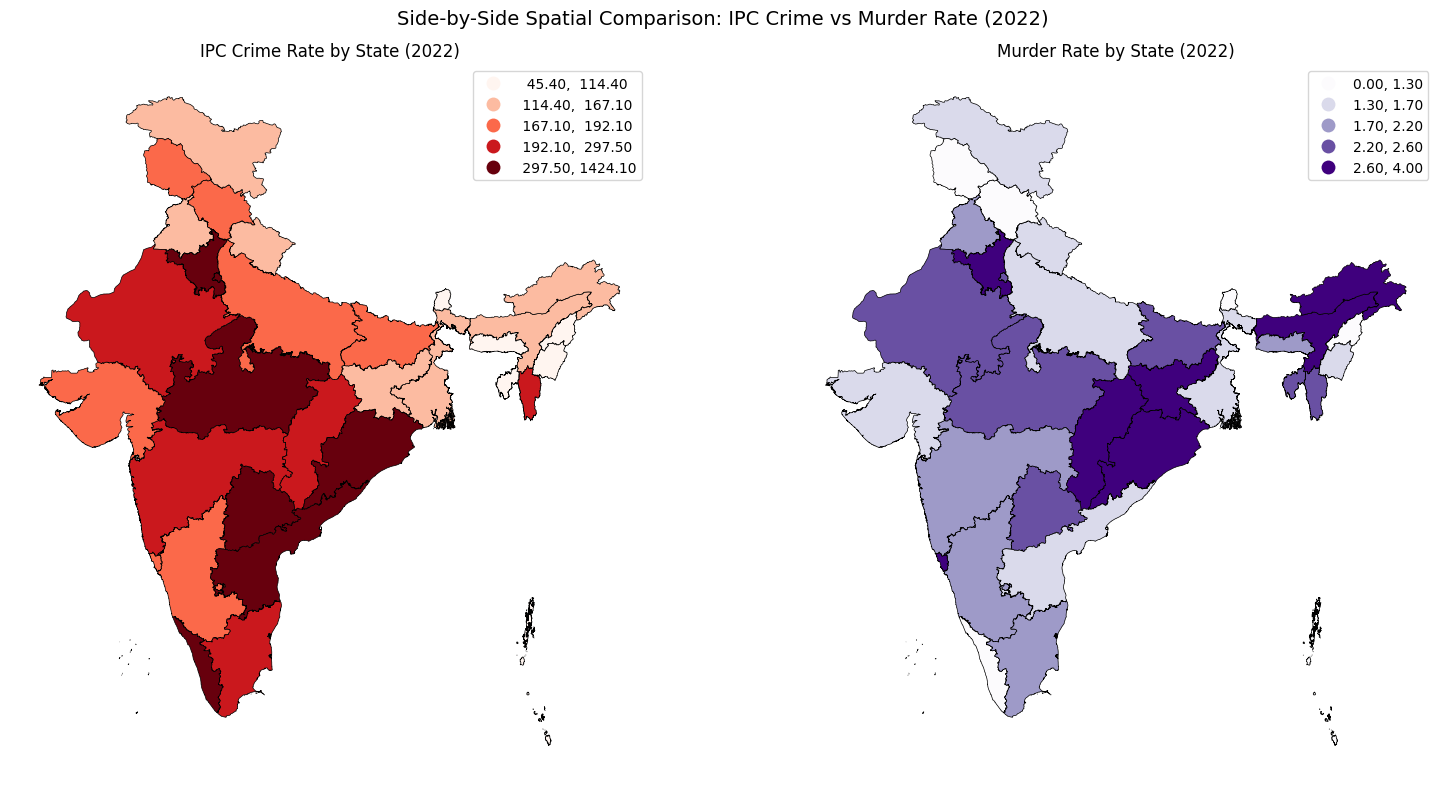

In [19]:
#Side-by-Side Comparison Maps – IPC Crime Rate vs Murder Rate (2022)
fig, axes = plt.subplots(1, 2, figsize=(16,8))

# IPC Crime Rate
map_df.plot(
    column="Rate of Cognizable Crimes (IPC) (2022)",
    scheme="Quantiles",
    k=5,
    cmap="Reds",
    linewidth=0.5,
    edgecolor="black",
    legend=True,
    ax=axes[0]
)
axes[0].set_title("IPC Crime Rate by State (2022)")
axes[0].axis("off")

# Murder Rate
map_df.plot(
    column="murder_rate_2022",
    scheme="Quantiles",
    k=5,
    cmap="Purples",
    linewidth=0.5,
    edgecolor="black",
    legend=True,
    ax=axes[1]
)
axes[1].set_title("Murder Rate by State (2022)")
axes[1].axis("off")

plt.suptitle("Side-by-Side Spatial Comparison: IPC Crime vs Murder Rate (2022)", fontsize=14)
plt.tight_layout()
plt.show()


States with high overall IPC crime rates do not always correspond to high murder rates, indicating differences between general crime prevalence and violent crime severity.

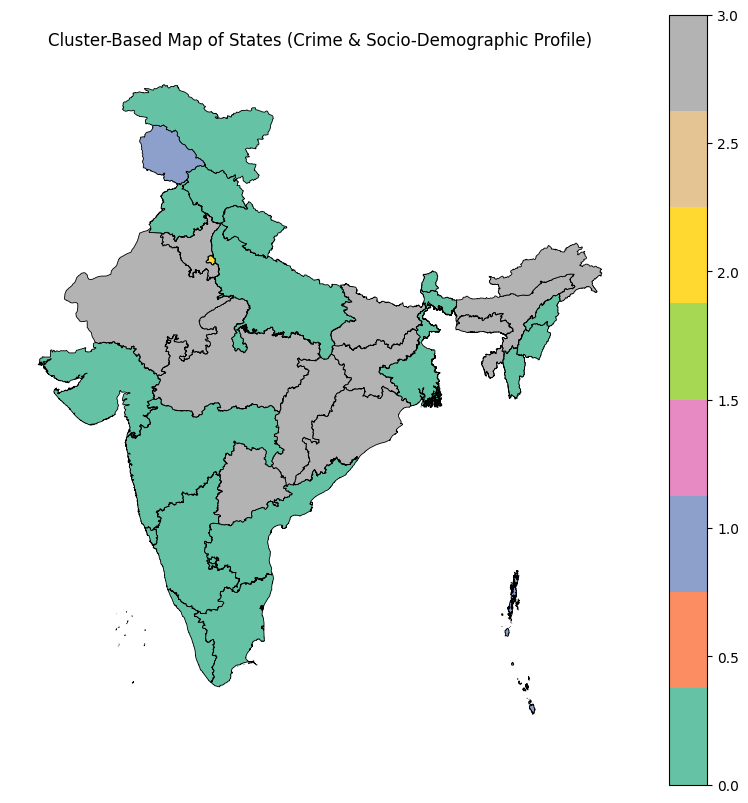

In [23]:
#Cluster-Based Choropleth Map – Crime & Socio-Demographic Clusters
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

cluster_df = map_df[
    [
        "Rate of Cognizable Crimes (IPC) (2022)",
        "murder_rate_2022",
        "literacy_rate_2011",
        "urbanization_rate_2011"
    ]
].copy()
cluster_df = cluster_df.dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cluster_df)

kmeans = KMeans(n_clusters=4, random_state=42)
cluster_df["cluster"] = kmeans.fit_predict(X_scaled)
map_df["cluster"] = np.nan
map_df.loc[cluster_df.index, "cluster"] = cluster_df["cluster"]
fig, ax = plt.subplots(1, 1, figsize=(10,10))

map_df.plot(
    column="cluster",
    cmap="Set2",
    linewidth=0.6,
    edgecolor="black",
    legend=True,
    ax=ax
)

ax.set_title("Cluster-Based Map of States (Crime & Socio-Demographic Profile)")
ax.axis("off")
plt.show()


States form distinct spatial clusters based on combined crime intensity and socio-demographic indicators, highlighting regional similarities beyond individual crime metrics.

c:\Users\Gayatri\OneDrive\Desktop\crime_analysis_india\venv\Lib\site-packages\geopandas\geodataframe.py:1969: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)
c:\Users\Gayatri\OneDrive\Desktop\crime_analysis_india\venv\Lib\site-packages\geopandas\geodataframe.py:1969: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)


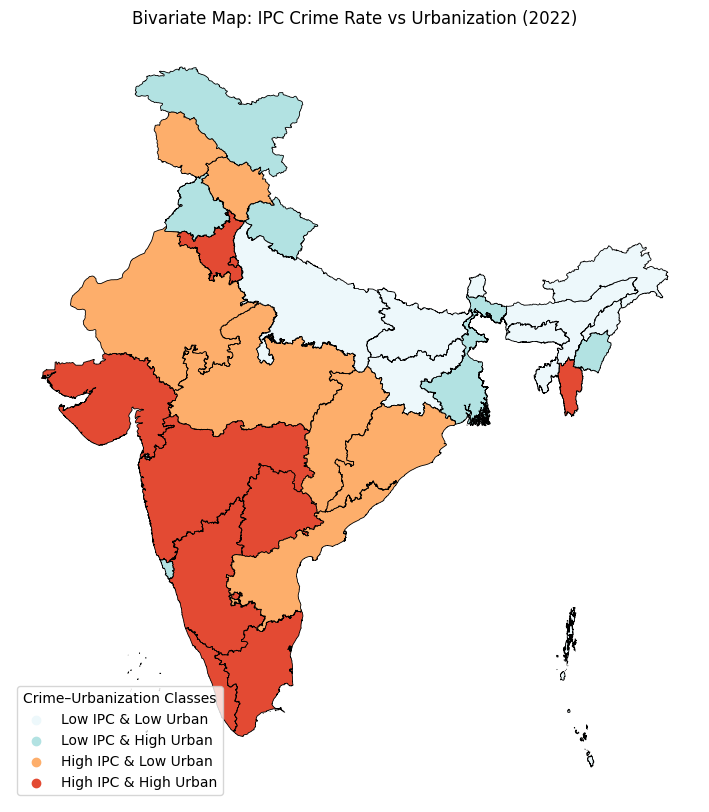

In [24]:
#Bivariate Choropleth Map IPC Crime Rate × Urbanization (2022)
ipc_median = map_df["Rate of Cognizable Crimes (IPC) (2022)"].median()
urban_median = map_df["urbanization_rate_2011"].median()

map_df["ipc_class"] = np.where(
    map_df["Rate of Cognizable Crimes (IPC) (2022)"] >= ipc_median,
    "High IPC",
    "Low IPC"
)

map_df["urban_class"] = np.where(
    map_df["urbanization_rate_2011"] >= urban_median,
    "High Urban",
    "Low Urban"
)

map_df["bivariate_class"] = map_df["ipc_class"] + " & " + map_df["urban_class"]
bivariate_colors = {
    "Low IPC & Low Urban": "#edf8fb",
    "Low IPC & High Urban": "#b2e2e2",
    "High IPC & Low Urban": "#fdae6b",
    "High IPC & High Urban": "#e34a33"
}
fig, ax = plt.subplots(1, 1, figsize=(10,10))

map_df.assign(
    color=map_df["bivariate_class"].map(bivariate_colors)
).plot(
    color=map_df["bivariate_class"].map(bivariate_colors),
    linewidth=0.6,
    edgecolor="black",
    ax=ax
)

ax.set_title("Bivariate Map: IPC Crime Rate vs Urbanization (2022)")
ax.axis("off")

# custom legend
for label, color in bivariate_colors.items():
    ax.scatter([], [], color=color, label=label)

ax.legend(
    title="Crime–Urbanization Classes",
    loc="lower left",
    frameon=True
)

plt.show()


Highly urbanized states tend to exhibit higher IPC crime rates, though several less-urbanized states also fall into high-crime categories, indicating that urbanization alone does not fully explain crime intensity.

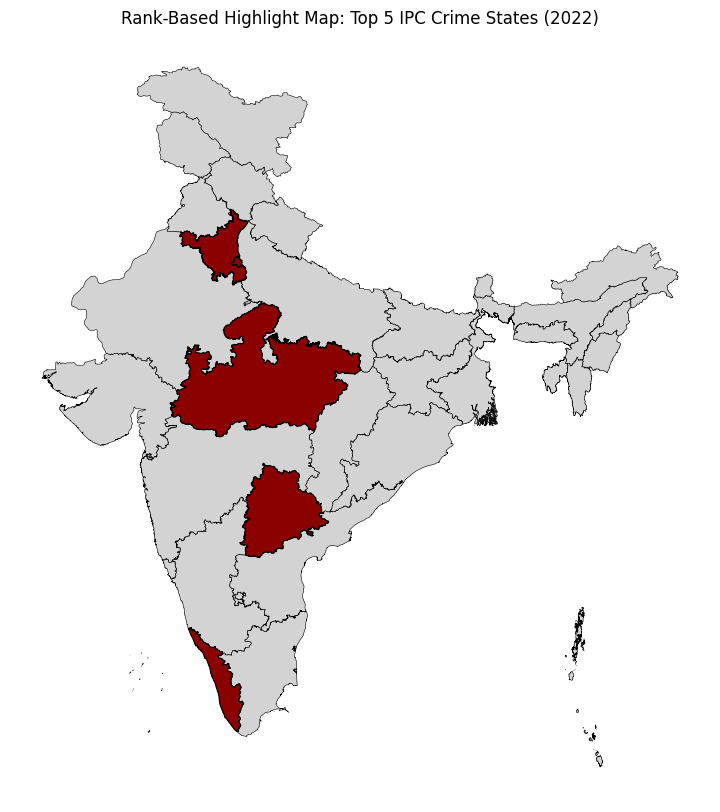

In [29]:
# find top 5 states by IPC crime rate
fig, ax = plt.subplots(1, 1, figsize=(10,10))

# plot other states
map_df[map_df["top5_flag"] == "Other States"].plot(
    ax=ax,
    color="lightgrey",
    edgecolor="black",
    linewidth=0.4
)

# plot top 5 states
map_df[map_df["top5_flag"] == "Top 5 States"].plot(
    ax=ax,
    color="darkred",
    edgecolor="black",
    linewidth=0.8
)

ax.set_title("Rank-Based Highlight Map: Top 5 IPC Crime States (2022)")
ax.axis("off")
plt.show()



The map clearly highlights a small subset of states that dominate the national IPC crime burden.

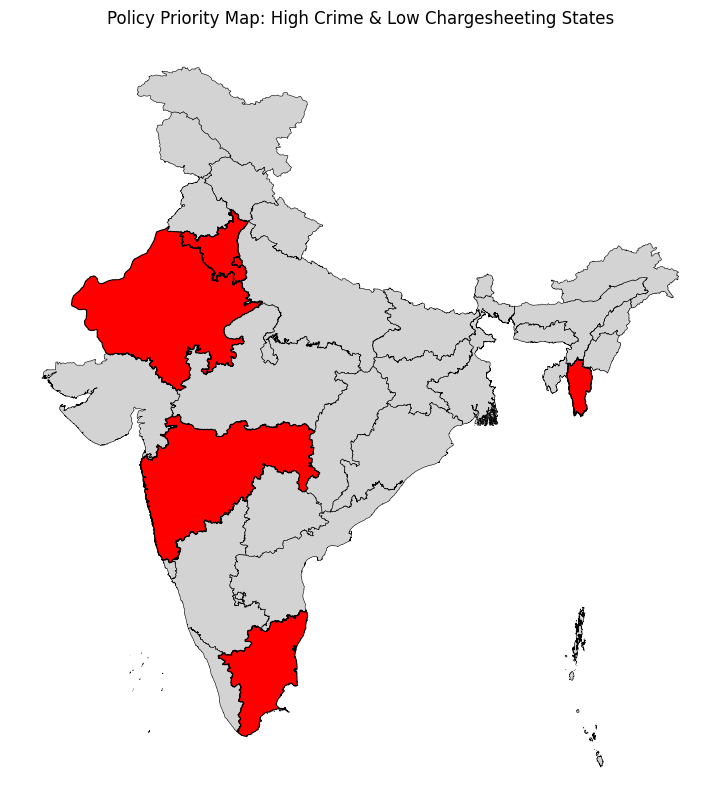

In [31]:
#Policy Priority Map
fig, ax = plt.subplots(1, 1, figsize=(10,10))

# other states
map_df[map_df["policy_priority"] == "Other States"].plot(
    ax=ax,
    color="lightgrey",
    edgecolor="black",
    linewidth=0.4
)

# high priority states
map_df[map_df["policy_priority"] == "High Priority"].plot(
    ax=ax,
    color="red",
    edgecolor="black",
    linewidth=0.8
)

ax.set_title("Policy Priority Map: High Crime & Low Chargesheeting States")
ax.axis("off")
plt.show()


Several states emerge as high-priority regions where elevated crime levels coincide with weaker judicial follow-through.

c:\Users\Gayatri\OneDrive\Desktop\crime_analysis_india\venv\Lib\site-packages\geopandas\geodataframe.py:1969: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)


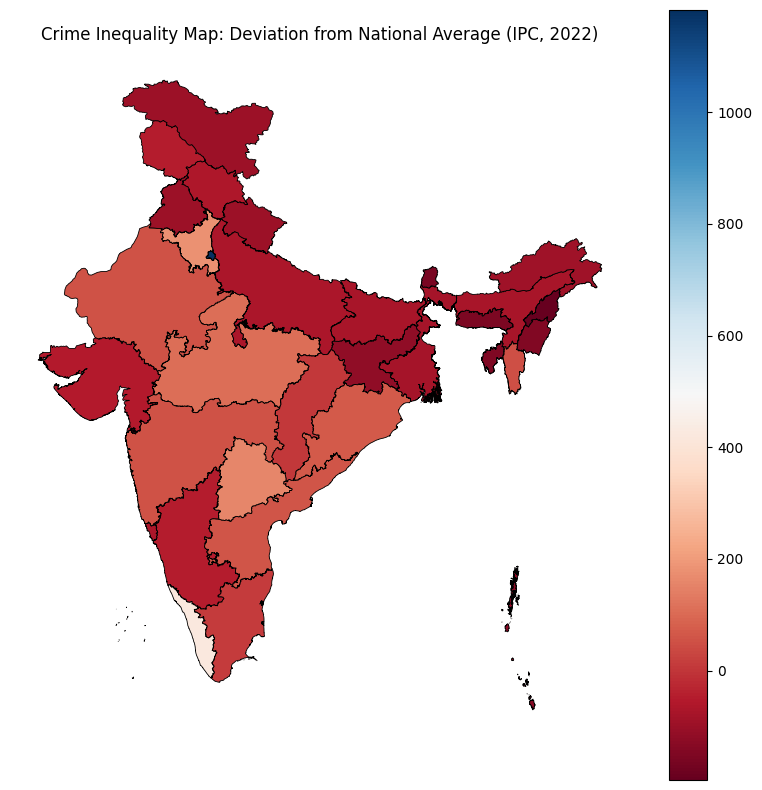

In [32]:
#Crime Inequality Map: Deviation from National Average IPC Crime Rate (2022)
national_avg = map_df["Rate of Cognizable Crimes (IPC) (2022)"].mean()

map_df["ipc_deviation"] = (
    map_df["Rate of Cognizable Crimes (IPC) (2022)"] - national_avg
)

fig, ax = plt.subplots(1, 1, figsize=(10,10))

map_df.plot(
    column="ipc_deviation",
    cmap="RdBu",
    linewidth=0.6,
    edgecolor="black",
    legend=True,
    ax=ax
)

ax.set_title("Crime Inequality Map: Deviation from National Average (IPC, 2022)")
ax.axis("off")
plt.show()


The deviation map highlights inequality in crime burden, clearly distinguishing states that exceed the national average from those performing better.

c:\Users\Gayatri\OneDrive\Desktop\crime_analysis_india\venv\Lib\site-packages\geopandas\geodataframe.py:1969: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)


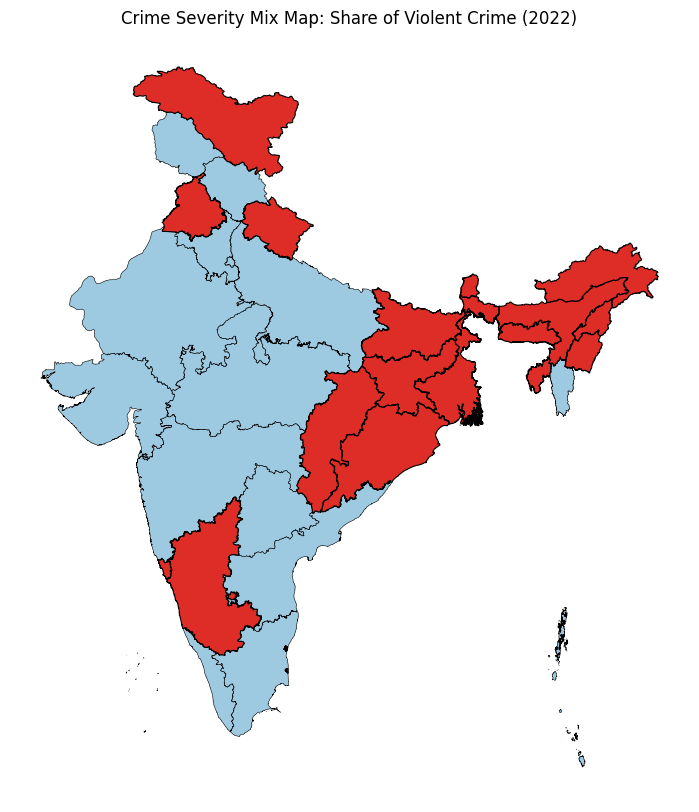

In [36]:
map_df["violent_share"] = (
    map_df["murder_rate_2022"] /
    map_df["Rate of Cognizable Crimes (IPC) (2022)"]
)
violent_median = map_df["violent_share"].median()

map_df["severity_mix"] = np.where(
    map_df["violent_share"] >= violent_median,
    "Relatively High Violent Share",
    "Relatively Low Violent Share"
)
fig, ax = plt.subplots(1, 1, figsize=(10,10))

# Low violent share
map_df[map_df["severity_mix"] == "Relatively Low Violent Share"].plot(
    ax=ax,
    color="#9ecae1",
    edgecolor="black",
    linewidth=0.4,
    aspect="auto"
)

# High violent share
map_df[map_df["severity_mix"] == "Relatively High Violent Share"].plot(
    ax=ax,
    color="#de2d26",
    edgecolor="black",
    linewidth=0.8,
    aspect="auto"
)

ax.set_title("Crime Severity Mix Map: Share of Violent Crime (2022)")
ax.axis("off")
plt.show()


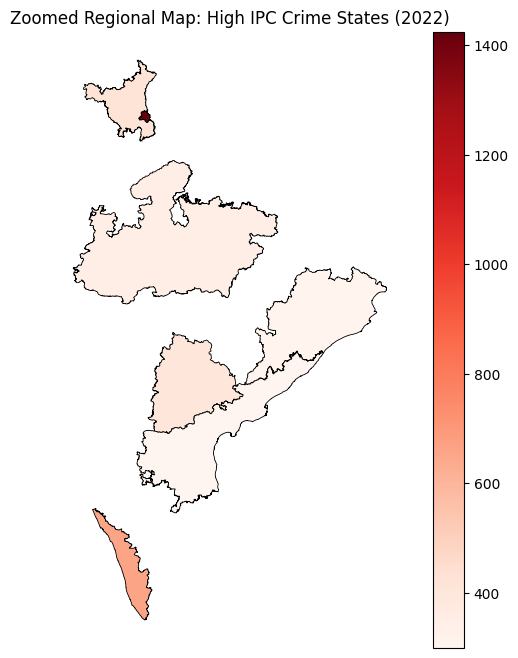

In [34]:
# select top 7 high crime states
top_states = (
    map_df.sort_values(
        "Rate of Cognizable Crimes (IPC) (2022)",
        ascending=False
    )
    .head(7)
)

fig, ax = plt.subplots(1, 1, figsize=(8,8))

top_states.plot(
    column="Rate of Cognizable Crimes (IPC) (2022)",
    cmap="Reds",
    linewidth=0.6,
    edgecolor="black",
    legend=True,
    ax=ax
)

ax.set_title("Zoomed Regional Map: High IPC Crime States (2022)")
ax.axis("off")
plt.show()
